In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# import data
train_c = pd.read_excel("data/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx").set_index("participant_id")
train_f = pd.read_csv("data/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv").set_index("participant_id")
train_q = pd.read_excel("data/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx").set_index("participant_id")
train_solution = pd.read_excel("data/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx").set_index("participant_id")

test_c = pd.read_excel("data/TEST/TEST_CATEGORICAL.xlsx").set_index("participant_id")
test_f = pd.read_csv("data/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv").set_index("participant_id")
test_q = pd.read_excel("data/TEST/TEST_QUANTITATIVE_METADATA.xlsx").set_index("participant_id")

In [3]:
train_c.head()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
participant_id,,,,,,,,,
00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [4]:
''' 
Functional connectivity matrix is stored as a flattened functional connectivity matrices, 
commonly used in Pearson correlation matrices. Only the upper triangle (excluding the diagonal) is stored
as the matrix is symmetric.

'''

train_f.head()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
participant_id,,,,,,,,,,,,,,,,,,,,,
70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,0.470063,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,0.276350,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,0.378557,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,0.259596,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,0.331445,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


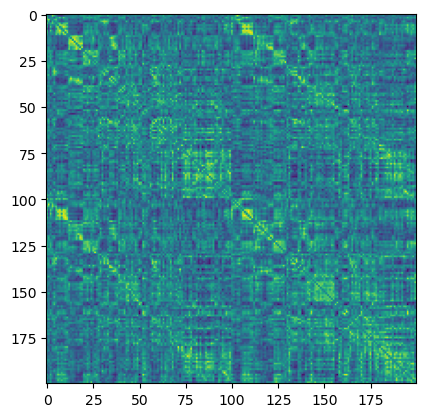

In [5]:
# store functional connectivity matrix as array
n_regions = 200
n_edges = int(n_regions * (n_regions - 1) / 2)

def upper_to_matrix(upper, n_regions):
    mat = np.zeros((n_regions, n_regions))
    triu_indices = np.triu_indices(n_regions, k=1)
    mat[triu_indices] = upper
    mat += mat.T  # make it symmetric
    return mat

# example for one subject
subject0_fc = upper_to_matrix(train_f.iloc[0], n_regions)
plt.imshow(subject0_fc)

https://pmc.ncbi.nlm.nih.gov/articles/PMC8946919/#sec2dot5-entropy-24-00390

***Characteristic path length.*** Paths are the sequences of distinct nodes that represent the potential flow of information between pairs of brain regions with shorter paths, implying stronger potential for integration. The length of a path estimates the potential for functional integration between brain regions. One of the most commonly used measures of functional integration is the average shortest path length between all pairs of nodes in the network, which is defined as the characteristic path length [15]. Paths between disconnected nodes are defined to have infinite length, which is a problem when calculating this measure, especially in sparse networks such as in functional connectivity. In practice, we take the average only between the existing paths, which can be a problem. For a discussion on this issue please refer to reference [29].

***Degree distribution.*** A measure of centrality, the degree of an individual node is equal to the number of links connected to that node, i.e., the number of neighbors of the node. The degree distribution is, therefore, the distribution of the degrees of all the nodes in the network. In functional connectivity, nodes with a high degree are interacting functionally with many other nodes in the network [29] and are referred to as hubs.

***Clustering coefficient.*** A measure of segregation, the clustering coefficient is the fraction of the node’s neighbors that are also neighbors of each other, which in graph theory is the fraction of triangles around an individual node. The presence of clusters in functional networks suggests an organization of statistical dependencies indicative of segregated functional neural processing, which is the ability for specialized processing to occur within densely interconnected groups of brain regions. The mean clustering coefficient for the network reflects, on average, the prevalence of clustered connectivity around individual nodes. The mean clustering coefficient is normalized individually for each node and can disproportionately be influenced by nodes with a low degree.

In [6]:
import networkx as nx

def matrix_to_graph(fc_matrix, threshold=0.2, binarize=False):
    """
    Convert a full FC matrix into a NetworkX graph.
    - threshold: values below this threshold are set to zero.
    - binarize: if True, convert nonzero entries to 1.
    """
    mat = np.copy(fc_matrix)
    np.fill_diagonal(mat, 0)  # Remove self-loops.
    mat[mat < threshold] = 0  # Apply threshold
    if binarize:
        mat = (mat > 0).astype(float)
    G = nx.from_numpy_array(mat)
    return G

In [7]:
def get_node_degrees(G):
    # For weighted degree, pass weight='weight'. For unweighted graphs, omit weight.
    return dict(G.degree(weight='weight'))

def get_shortest_path_lengths(G):
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

def characteristic_path_length(length_dict, n_nodes):
    # For each node i, compute average path length to all others,
    # then average over all nodes.
    L_values = []
    for i in range(n_nodes):
        # Only include nodes that are connected.
        dists = [length for j, length in length_dict[i].items() if i != j]
        if len(dists) > 0:
            L_values.append(np.mean(dists))
    return np.mean(L_values)

def get_triangle_counts(G):
    # NetworkX returns a dictionary with the number of triangles per node.
    return nx.triangles(G)

def get_clustering_coefficients(G):
    # Returns a dictionary with local clustering coefficients.
    return nx.clustering(G, weight='weight')

def average_clustering(G):
    # Average clustering coefficient over all nodes.
    return nx.average_clustering(G, weight='weight')

In [8]:
def process_subject(fc_vector, n_regions=200, threshold=0.2, binarize=False):
    """
    Process one subject's FC vector:
      - Convert to full matrix
      - Convert to graph (thresholding/binarizing)
      - Calculate graph metrics.
    """
    fc_matrix = upper_to_matrix(fc_vector, n_regions)
    G = matrix_to_graph(fc_matrix, threshold=threshold, binarize=binarize)
    n_nodes = n_regions

    degrees = get_node_degrees(G)
    tri_counts = get_triangle_counts(G)
    local_clustering = get_clustering_coefficients(G)
    avg_clust = average_clustering(G)
    length_dict = get_shortest_path_lengths(G)
    char_path_len = characteristic_path_length(length_dict, n_nodes)

    return [degrees, tri_counts, local_clustering, avg_clust, char_path_len]

In [ ]:
metrics_columns = ['degrees', 'tri_counts', 'local_clustering', 'avg_clust', 'char_path_len']
train_metrics = pd.DataFrame(columns=metrics_columns)

for index, row in train_f.iterrows():
    fc_vector = row.values  # Get the FC vector as a NumPy array
    curr_result_list = process_subject(fc_vector, n_regions=200, threshold=0, binarize=False)

    # Store results in a DataFrame (dict-type metrics will be stored as objects)
    curr_result_df = pd.DataFrame(
        [curr_result_list], columns=metrics_columns, index=[index]
    )

    train_metrics = pd.concat([train_metrics, curr_result_df])
